In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
X = np.array([
    [-2, -1, 0, 1, 2],
    [-2, -1, 0, 1, 2],
    [-2, -1, 0, 1, 2],
    [-2, -1, 0, 1, 2],
    [-2, -1, 0, 1, 2],
])
Y = np.array([
    [-2, -2, -2, -2, -2],
    [-1, -1, -1, -1, -1],
    [0, 0, 0, 0, 0],
    [1, 1, 1, 1, 1,],
    [2, 2, 2, 2, 2],
])
x = np.arange(-2, 2, 0.1)
y = np.arange(-2, 2, 0.1)
X, Y = np.meshgrid(x, y)
Z = X ** 2 + Y ** 2

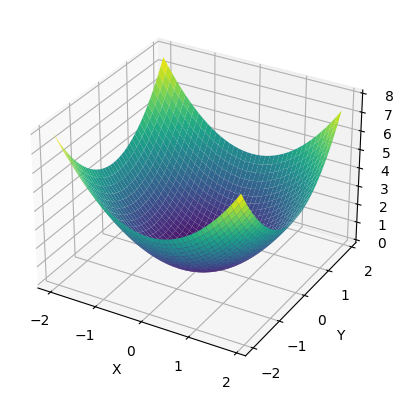

In [3]:
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

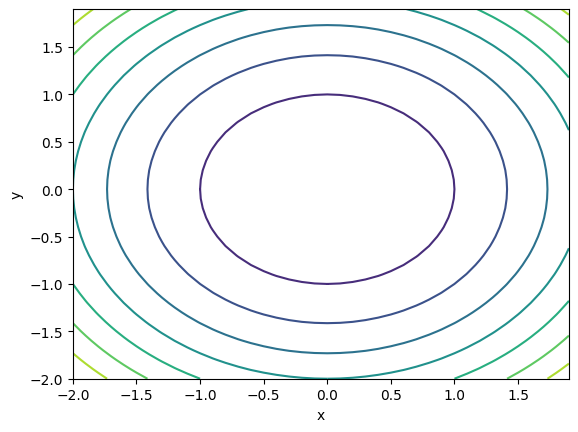

In [4]:
ax = plt.axes()
ax.contour(X, Y, Z)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

In [5]:
def multivariate_normal(x, mu, cov):
    det = np.linalg.det(cov)  # 行列式
    inv = np.linalg.inv(cov)  # 逆行列
    D = len(x)
    z = 1 / np.sqrt((2 * np.pi) ** D * det)
    y = z * np.exp((x - mu).T @ inv @ (x - mu) / -2.0)
    return y

In [6]:
mu = np.array([0.5, -0.2])
cov = np.array([
    [3.0, 0.3],
    [0.3, 1.0]
])
xs = ys = np.arange(-5, 5, 0.1)
X, Y = np.meshgrid(xs, ys)
Z = np.zeros_like(X)

for i in range(X.shape[0]):
    for j in range(Y.shape[0]):
        x = np.array([X[i, j], Y[i, j]])
        Z[i, j] = multivariate_normal(x, mu, cov)

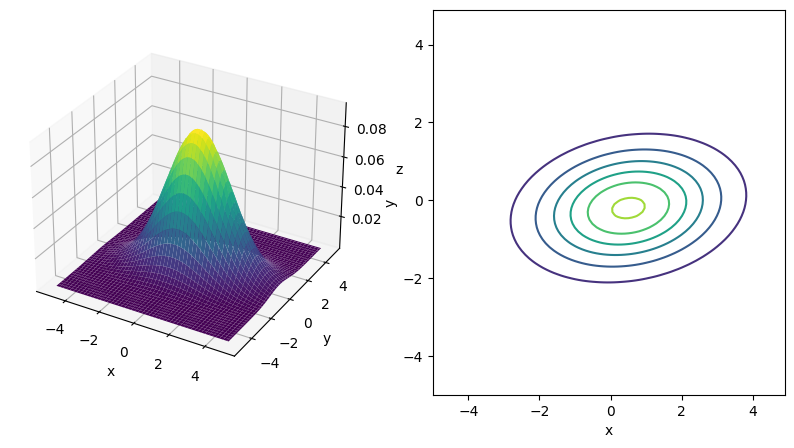

In [7]:
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.plot_surface(X, Y, Z, cmap='viridis')

ax2 = fig.add_subplot(1, 2, 2)
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.contour(X, Y, Z)
plt.show()

In [8]:
np.random.seed(0)

N = 10000
D = 2
xs = np.random.rand(N, D)

mu = np.sum(xs, axis=0)
mu /= N

cov = 0

for n in range(N):
    x = xs[n]
    z = x - mu
    z = z[:, np.newaxis]
    cov += z * z.T
cov /= N
print(mu, cov)

# 平均、共分散を計算する関数はnumpyに用意されている
mu2 = np.mean(xs, axis=0)
cov2 = np.cov(xs, rowvar=False)
print(mu2, cov2)


[0.49443495 0.49726356] [[ 0.08476319 -0.00023128]
 [-0.00023128  0.08394656]]
[0.49443495 0.49726356] [[ 0.08477167 -0.0002313 ]
 [-0.0002313   0.08395496]]


(25000, 2)


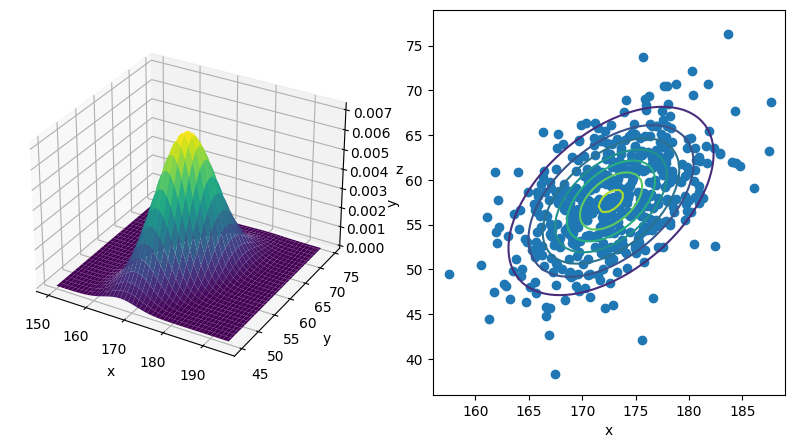

In [17]:
xs = np.loadtxt('data/height_weight.txt')
print(xs.shape)
mu = np.mean(xs, axis=0)
cov = np.cov(xs, rowvar=False)

small_xs = xs[:500]

X, Y = np.meshgrid(np.arange(150, 195, 0.5),
                   np.arange(45, 75, 0.5))
Z = np.zeros_like(X)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        x = np.array([X[i, j], Y[i, j]])
        Z[i, j] = multivariate_normal(x, mu, cov)

fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.plot_surface(X, Y, Z, cmap='viridis')

ax2 = fig.add_subplot(1, 2, 2)
ax2.scatter(small_xs[:,0], small_xs[:,1])
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_xlim(156, 189)
ax2.set_ylim(36, 79)
ax2.contour(X, Y, Z)
plt.show()